## Image classification using Tensorflow


#### Dataset: MNIST Fashion


#### Data description:
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

#### Class Labels:
Each training and test example is assigned to one of the following labels:

0 : T-shirt/top <br>
1 : Trouser <br>
2 : Pullover <br>
3 : Dress <br>
4 : Coat <br>
5 : Sandal <br>
6 : Shirt <br>
7 : Sneaker <br>
8 : Bag <br>
9 : Ankle boot <br>

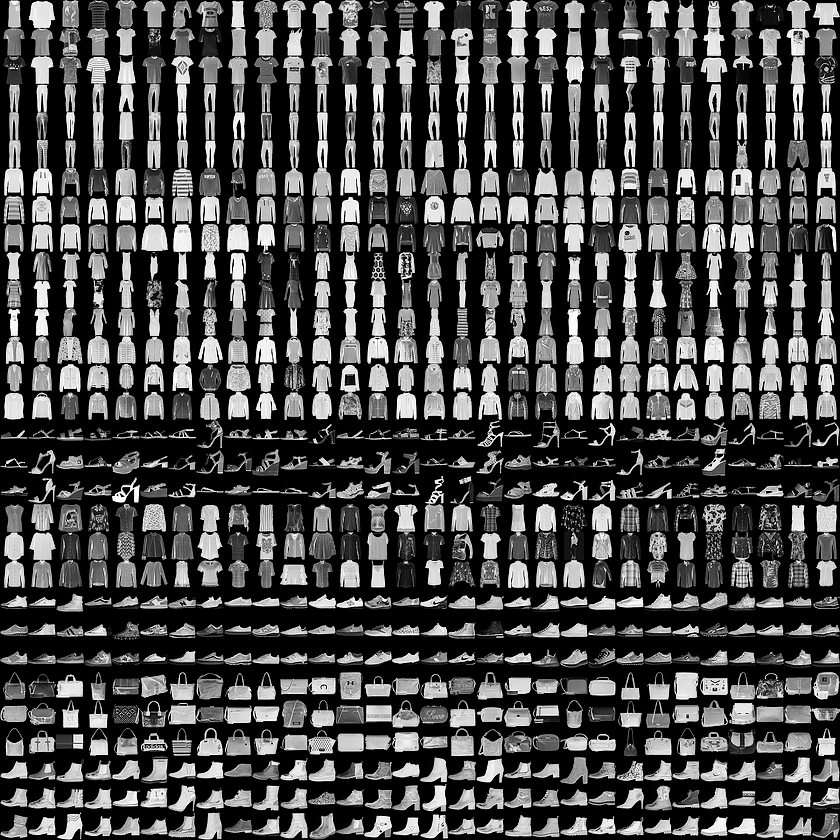

#### Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
from numpy import linalg
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import HTML
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
import keras
from keras.utils import to_categorical
from keras.utils import np_utils
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D


from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report
import itertools

Using TensorFlow backend.


#### Loading the data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Data Exploration

In [3]:
print("Shape of training data: ",train_images.shape)    #Checking the shape of train data
print("Class Distribution of training data: ")          
unique, counts = np.unique(train_labels, return_counts=True)   # Checking class distribution of train data
print(np.asarray((unique, counts)).T)

Shape of training data:  (60000, 28, 28)
Class Distribution of training data: 
[[   0 6000]
 [   1 6000]
 [   2 6000]
 [   3 6000]
 [   4 6000]
 [   5 6000]
 [   6 6000]
 [   7 6000]
 [   8 6000]
 [   9 6000]]


In [4]:
print("Shape of test data: ",test_images.shape)    #Checking the shape of test data
print("Class Distribution of test data: ")          
unique, counts = np.unique(test_labels, return_counts=True)   # Checking class distribution of test data
print(np.asarray((unique, counts)).T)

Shape of test data:  (10000, 28, 28)
Class Distribution of test data: 
[[   0 1000]
 [   1 1000]
 [   2 1000]
 [   3 1000]
 [   4 1000]
 [   5 1000]
 [   6 1000]
 [   7 1000]
 [   8 1000]
 [   9 1000]]


#### What we see vs what computer/algorithm see


              

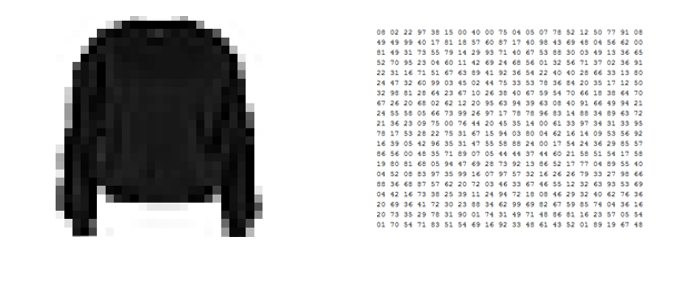

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 0, 'Ankle boot')

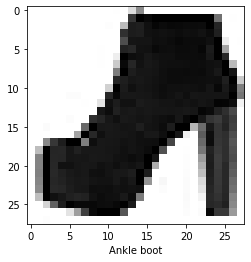

In [6]:
# Checking how we see a random image from train data
plt.imshow(train_images[44], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[44]])

In [7]:
# Checking how computer/algorithm sees the above random image (28*28 pixels)
np.set_printoptions(precision=2, suppress=True, linewidth=120)
print(np.matrix(train_images[44]))

[[  0   0   0   0   0   0   0   0   0   0   0   1   0  34 116   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 201 254 247 255 255 255 255 255 255 255 255 142   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0  68 227 224 238 249 244 247 245 244 244 243 255 218   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 227 225 237 240 237 240 243 240 241 236 244 223   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 177 234 235 235 241 240 243 246 244 244 244 239 255  18   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0 220 216 236 237 245 242 241 244 244 243 248 228 255  91   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0  17 255 242 239 232 236 239 239 243 243 243 244 231 255 215   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0  53 245 217 236 231 234 239 240 240 241 243 242 239 236 255  68   0]
 [  0   0   0   0   0   0   0   0   0   0   0 130 255 226 233 233 235 240 243 24

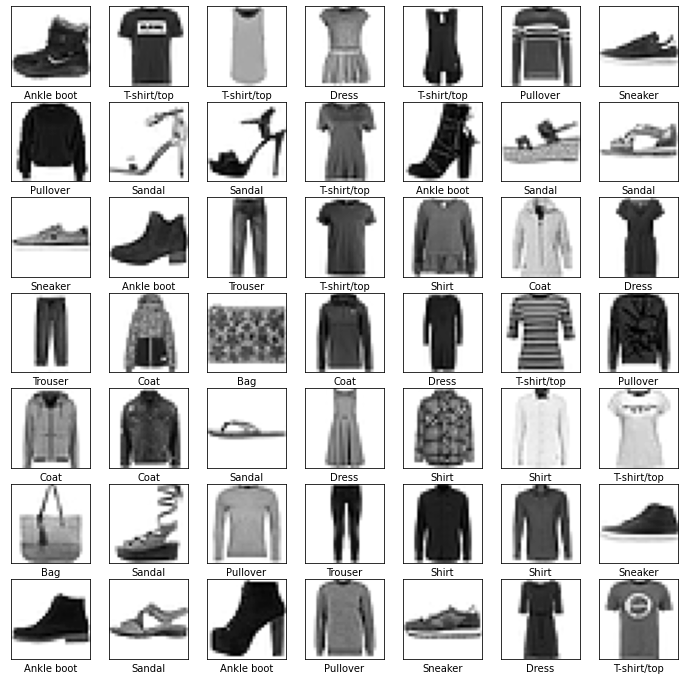

In [8]:
# Viewing a set of images from train data and displaying the corresponding label.
plt.figure(figsize=(12,12))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Data Preprocessing

In [3]:
# Dividing the train dataset to training and validation datasets in 80,20 ratio
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=101)

In [4]:
# Print the number of images in training, validation, and test datasets
print(X_train.shape[0], 'train set')
print(X_val.shape[0], 'validation set')
X_test = test_images
print(X_test.shape[0], 'test set')

48000 train set
12000 validation set
10000 test set


In [5]:
print("Shape of training data: ",X_train.shape)
print("Shape of validation data: ",X_val.shape)
print("Shape of test data: ",X_test.shape)
print("Shape of training data labels: ",y_train.shape)
print("Shape of validation data labels: ",y_val.shape)
y_test = test_labels
print("Shape of test data labels: ",y_test.shape)

Shape of training data:  (48000, 28, 28)
Shape of validation data:  (12000, 28, 28)
Shape of test data:  (10000, 28, 28)
Shape of training data labels:  (48000,)
Shape of validation data labels:  (12000,)
Shape of test data labels:  (10000,)


In [6]:
# # Normalizing the pixel brightness values to a range of 0-1 because the neural network takes more time to learn from large numbers.
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [7]:
# Checking the shape of test image with index '0'
X_train[0].shape

(28, 28)

In [8]:
# Re-shaping input data from (28, 28) to (28, 28, 1) because CNN expects the input shape of form (x*y*n) 
w, h = 28, 28
x_train = X_train.reshape(X_train.shape[0], w, h, 1)
x_val = X_val.reshape(X_val.shape[0], w, h, 1)
x_test = X_test.reshape(X_test.shape[0], w, h, 1)

In [9]:
# Checking the shape of test image with index '0' after re-shaping.
x_train[0].shape

(28, 28, 1)

In [10]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [11]:
# Checking the shape after one-hot encoding
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(48000, 10)
(12000, 10)
(10000, 10)


### Model building

#### We are using a Convolution Neural Network(CNN) for classifying the images. Images below represent the architecture of a CNN.
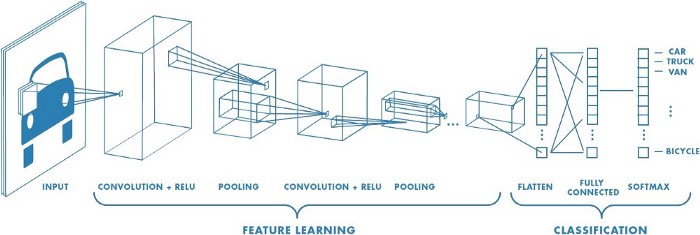
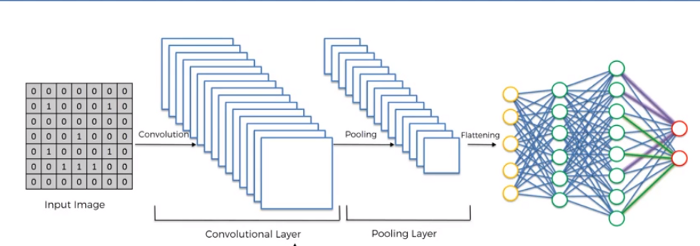

#### Kernel

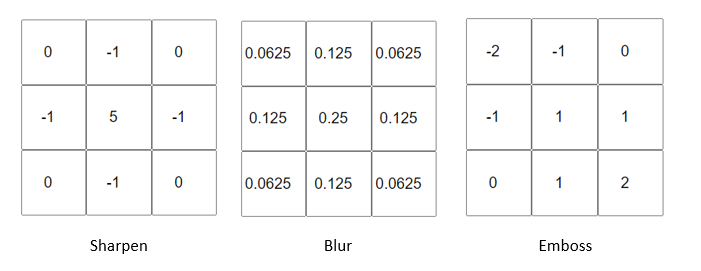

#### To understand more about kernels, please use below link:
https://setosa.io/ev/image-kernels/

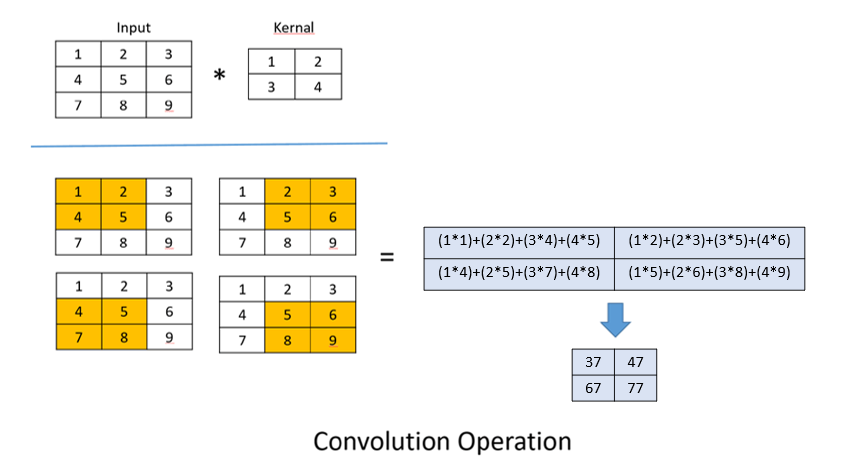

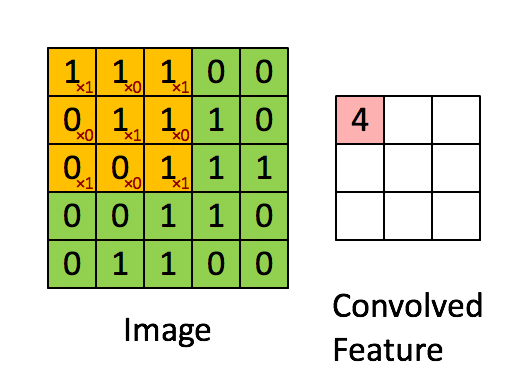

In [23]:
Image("C:/Fortnightly_challenge/giphy.gif")

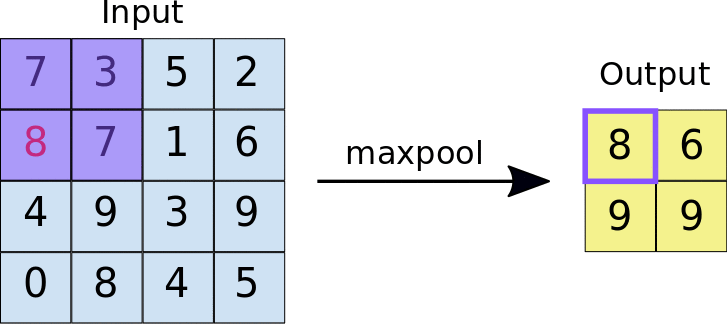

In [24]:
Image("C:/Fortnightly_challenge/maxpool_animation.gif")

In [12]:
model = Sequential()

# Must define the input shape in the first layer of the neural network
model.add(Convolution2D(filters= 32, kernel_size=(3,3),input_shape = (28,28,1) , activation='relu'))
# Sometimes, kernels will have negative values. If we take the dot product, we will end up with negative values in the 
# convolved feature maps. But to make sure our neural network does not learn from negative numbers, we use a 'relu' activation
# function. It converts all negative numbers to zeroes. All positive numbers remain same.
model.add(MaxPooling2D(pool_size=2))

# Adding another convolution layer and a max pooling layer
model.add(Convolution2D(filters=32, kernel_size=(3,3),input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Flattening the outputs from max pooling layer and giving them as input to the Feed Forward Neural Network
model.add(Flatten())

# Adding a hidden layer with 128 nodes
model.add(Dense(output_dim = 128 , activation="relu"))

# Using dropout to avoid overfitting
model.add(Dropout(0.5))

# Adding output layer with 10 nodes because there are a total of 10 classes
model.add(Dense(output_dim = 10, activation='softmax'))
# Softmax function converts integers to probability scale. So for multi-class problems, softmax is used with the output layer.
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

C:\Users\pavani.gangula.HCLTECH\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  from ipykernel import kernelapp as app
C:\Users\pavani.gangula.HCLTECH\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


#### To understand or visualize the entire CNN architecture, and to experiment, visit below link:

https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [ ]:
# In the first convolution layer, we get (3*3*32) + 32 = 320 parameters because we defined thirty two 3*3 kernels. 
# Each 3*3 kernel has 9 weights. 
# For second convolution layer, we have [(3*3*32) * 32] + 32 = 9248 parameters. Because we need to update the weights in the 
# previous layer as well. 
# After the second max pooling layer, we get thirty two 5*5 matrices. So total inputs to the feed forward neural network will 
# be 5*5*32 = 800. Hence we have 800 node input layer.
# The number of parameters for the first dense layer will be (800*128) + 128 = 102528.
# The number of parameters for output layer will be (128*10)+10 = 1290, because we have 10 output nodes.

In [14]:
# Training the model on a batch size of 64 samples and 10 epochs
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 36s 741us/step - loss: 0.6670 - accuracy: 0.7566 - val_loss: 0.4282 - val_accuracy: 0.8452
Epoch 2/10
48000/48000 [==============================] - 35s 733us/step - loss: 0.4501 - accuracy: 0.8375 - val_loss: 0.3605 - val_accuracy: 0.8676
Epoch 3/10
48000/48000 [==============================] - 35s 724us/step - loss: 0.3963 - accuracy: 0.8574 - val_loss: 0.3262 - val_accuracy: 0.8818
Epoch 4/10
48000/48000 [==============================] - 34s 717us/step - loss: 0.3623 - accuracy: 0.8702 - val_loss: 0.3041 - val_accuracy: 0.8877
Epoch 5/10
48000/48000 [==============================] - 35s 737us/step - loss: 0.3369 - accuracy: 0.8782 - val_loss: 0.2891 - val_accuracy: 0.8936
Epoch 6/10
48000/48000 [==============================] - 35s 719us/step - loss: 0.3152 - accuracy: 0.8865 - val_loss: 0.2953 - val_accuracy: 0.8931
Epoch 7/10
48000/48000 [==============================] 

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9028000235557556


#### We have got around 90% accuracy for test dataset.

In [16]:
predictions = model.predict(x_test)
# Checking the probability values that our CNN has got for each class, for the test image with index '7'
print("Output values for test image with index 7: ",predictions[7])
# Checking the highest probability value. 
print("Class with highest probability value: ",np.argmax(predictions[7]))


Output values for test image with index 7:  [1.9990277e-04 2.6166180e-07 2.1231570e-03 1.6031587e-04 4.0059593e-02
 1.2635316e-07 9.5736849e-01 3.4757919e-10 8.8267589e-05 9.2153893e-09]
Class with highest probability value:  6


Classes:<br/>
0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'

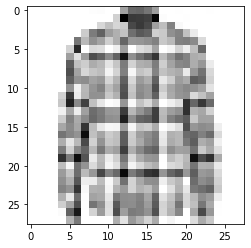

In [17]:
# Viewing the same test image to cross check.
plt.imshow(test_images[7],cmap=plt.cm.binary)

#### Our CNN alogorithm is predicting a shirt to be a shirt.

In [18]:
# Save all the predicted labels to a list
pred_labels = []
for i in range(0,len(predictions)):
    pred_lables = pred_labels.append(np.argmax(predictions[i])) 
print(pred_labels)

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5, 1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 0, 7, 4, 7, 2, 1, 4, 6, 4, 4, 5, 8, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1, 3, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 2, 2, 3, 6, 7, 2, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 2, 1, 5, 4, 1, 9, 1, 8, 4, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 3, 4, 1, 4, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 2, 7, 4, 2, 0, 5, 4, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 2, 1, 3, 1, 6, 7, 2, 8, 5, 2, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 4, 5, 6, 9, 2, 2, 8, 6, 4, 6, 2, 9, 7, 6, 5, 5, 4, 8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 4, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 6, 4, 0, 6, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 2, 4, 2, 4, 7, 1, 6, 4, 8, 2, 6, 5, 6, 2, 7, 7, 7, 3, 3, 7, 6, 

In [19]:
# Checking the distribution of predicted class labels
unique, counts = np.unique(pred_labels, return_counts=True)

print("Class distribution of predictions for test data:")
print(np.asarray((unique, counts)).T)

Class distribution of predictions for test data:
[[   0 1038]
 [   1  977]
 [   2 1022]
 [   3  995]
 [   4 1061]
 [   5  989]
 [   6  883]
 [   7 1033]
 [   8 1017]
 [   9  985]]


In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

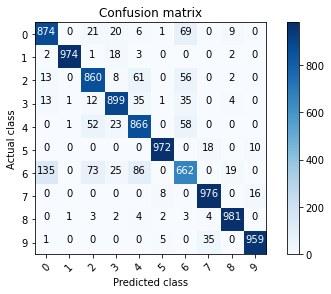

In [21]:
# Printing the confusion matrix
Y_true = test_labels
confusion_mtx = confusion_matrix(Y_true, pred_labels) 
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [22]:
# Checking the classification report
print(classification_report(y_true = Y_true, y_pred = pred_labels))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       1.00      0.97      0.99      1000
           2       0.84      0.86      0.85      1000
           3       0.90      0.90      0.90      1000
           4       0.82      0.87      0.84      1000
           5       0.98      0.97      0.98      1000
           6       0.75      0.66      0.70      1000
           7       0.94      0.98      0.96      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [28]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [32]:
# Checking AUC ROC score for the multi class problem
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
multiclass_roc_auc_score(Y_true, pred_labels)

0.9457222222222221